## Set up environment and install dependences

In [1]:
import os
import warnings
warnings.filterwarnings('ignore')

import rubetools
from rubetools import PascalVOC, Yolo, MSCOCO

## Load data

In [3]:
pascal_img_dir = os.path.join('data/images')
pascal_ann_dir = os.path.join('data/pascalvoc')
pascalvoc = PascalVOC(ann_path=pascal_ann_dir, img_path=pascal_img_dir)
pascalvoc

100%|██████████| 10/10 [00:00<00:00, 506.43it/s]
2021-03-12 11:15:49 - Loaded 10 PascalVOC annotations.


<PascalVOC, annotations: 10, labels: 2>

## Save data

To save changes  in annotations call **save** method:

In [4]:
pascalvoc.save()

100%|██████████| 10/10 [00:00<00:00, 810.20it/s]
2021-03-12 11:15:50 - PascalVOC: Saved 10 annotations.
2021-03-12 11:15:50 - Saved in PascalVOC.


#### After loading annotations to memory you can do the following:
1. convert to any implemented format
2. rename classes
3. slice images and corresponding annotations
4. dataset split (train/test)
5. object distribution statistics
6. image and annotation name matching

## 1. Convert annotations

#### to **Yolo:**

New converted **Yolo** annotations will be saved in **save_path** directory in a separate folder. The images will not be saved as **is_save_images** equals **False**.

In [5]:
pascalvoc.convert_to(Yolo, save_path='output/yolo', is_save_images=False)

100%|██████████| 10/10 [00:00<00:00, 1880.85it/s]
2021-03-12 11:15:58 - Yolo: Saved 10 annotations.
2021-03-12 11:15:58 - Saved in Yolo.


#### to **MSCOCO:**

You can save loaded annotation objects in any available formats, for instance, let's save annotations in **MSCOCO** and save images as well. 

In [6]:
pascalvoc.convert_to(MSCOCO, save_path='output/mscoco', is_save_images=True)

10it [00:00, 1497.75it/s]
2021-03-12 11:15:59 - MSCOCO: Saved 10 annotations.
2021-03-12 11:15:59 - MSCOCO: Saved 10 images.
2021-03-12 11:15:59 - Saved in MSCOCO.


## 2. Rename classes

If you want to unify class names, you can rename labels via **rename_classes** method. Set dictionary for renaming: key - initial class name, value - new class name.

In [7]:
help(pascalvoc.rename_classes)

Help on method rename_classes in module rubetools.formats.base:

rename_classes(rename_dict: 'Dict[str, str]') method of rubetools.formats.pascalvoc.PascalVOC instance
    Rename class labels for every annotation
    :param rename_dict: class name renaming dictionary. key: old class name, value: new class name
    :return:



Statistics before renaming:

In [8]:
pascalvoc.labels_stat

{'small_vehicle': 217, 'large_vehicle': 20}

In [9]:
pascalvoc.rename_classes(rename_dict={'small_vehicle': 'car', 'large_vehicle': 'car'})

2021-03-12 11:16:12 - Renamed 237 objects in 9 annotations.


All objects with **small_vehicle** and **large_vehicle** were renamed to **car** class

Statistics after renaming:

In [10]:
pascalvoc.labels_stat

{'car': 237}

Let's save all changes in annotations in separate folder:

In [11]:
pascalvoc.save(save_dir='output/pascalvoc')

100%|██████████| 10/10 [00:00<00:00, 811.54it/s]
2021-03-12 11:16:39 - PascalVOC: Saved 10 annotations.
2021-03-12 11:16:39 - Saved in PascalVOC.


## 3. Image slicing
Let's slice images into fragments of given size and with given step and save corresponding annotations:

In [12]:
pascalvoc.slice_images(img_save_dir='output/pascalvoc', shape=(416, 416))

100%|██████████| 10/10 [00:00<00:00, 24.21it/s]
2021-03-12 11:16:51 - Split 66 fragments from 10 images.


In [13]:
pascalvoc.save(save_dir='output/pascalvoc')

100%|██████████| 66/66 [00:00<00:00, 4452.34it/s]
2021-03-12 11:16:54 - PascalVOC: Saved 66 annotations.
2021-03-12 11:16:54 - Saved in PascalVOC.


## 4. Dataset split (train/test)

Let's split our dataset into train and test. After that, we can work with them separately.

In [14]:
pascal_train, pascal_test = pascalvoc.split(ratio=(0.8, 0.2))
pascal_train.save(save_dir='output/pascalvoc/train')
pascal_test.save(save_dir='output/pascalvoc/test')

100%|██████████| 52/52 [00:00<00:00, 3328.71it/s]
2021-03-12 11:17:03 - PascalVOC: Saved 52 annotations.
2021-03-12 11:17:03 - Saved in PascalVOC.
100%|██████████| 14/14 [00:00<00:00, 3831.41it/s]
2021-03-12 11:17:03 - PascalVOC: Saved 14 annotations.
2021-03-12 11:17:03 - Saved in PascalVOC.


## 5. Statistics

To conduct EDA you can use implemented methods to get statistics of key characteristics

#### Pandas - annotation object statistics:

In [15]:
pascalvoc.eda.info_df.head()

,filename,img_width,img_height,box_width,box_height,label,type
0,DJI-00760-00022_2.jpg,416,416,80.0,49.0,car,HBox
1,DJI-00760-00022_2.jpg,416,416,74.0,45.0,car,HBox
2,DJI-00760-00022_2.jpg,416,416,210.0,92.0,car,HBox
3,DJI-00760-00022_2.jpg,416,416,73.0,36.0,car,HBox
4,DJI-00760-00022_2.jpg,416,416,74.0,43.0,car,HBox


#### Class label bar graph:


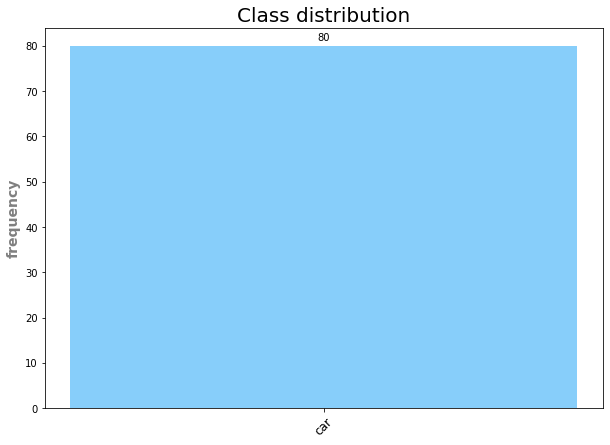

In [16]:
pascalvoc.eda.plot_classes_histogram()

#### Image size distribution:

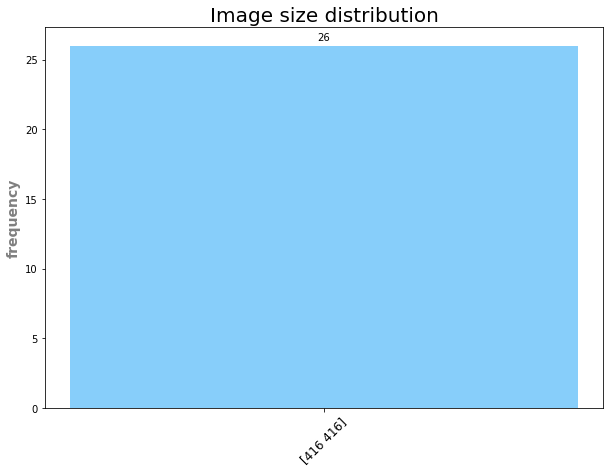

In [17]:
pascalvoc.eda.plot_image_size_histogram()

#### Object size distribution in relative values:


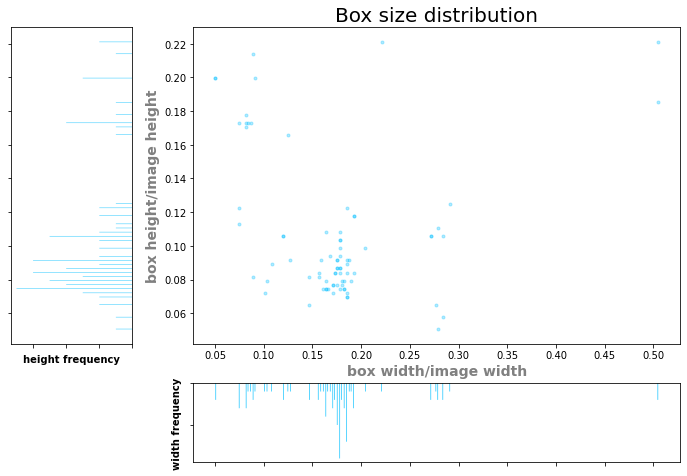

In [18]:
pascalvoc.eda.plot_objects_frequency_scatter()

#### Channel-wise brightness distribution

100%|██████████| 66/66 [00:00<00:00, 315.67it/s]


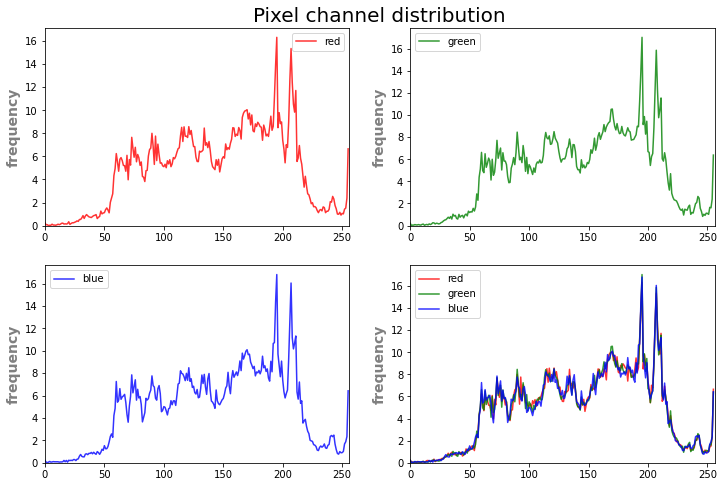

In [19]:
pascalvoc.eda.image_color_histogram()